This is solving MNist using a CNN with dilated convolutions

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plot
import numpy as np
import random

Using TensorFlow backend.


In [2]:
num_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

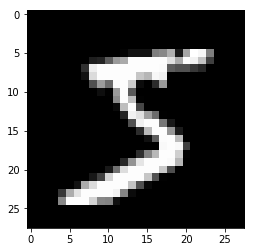

In [3]:
plot.imshow(x_train[0].reshape(28, 28), cmap='gray')
plot.show()

In [4]:
x_train.shape[1:]

(28, 28, 1)

This one is using dilated convolutions. So the convolution kernel will dilate and then step.

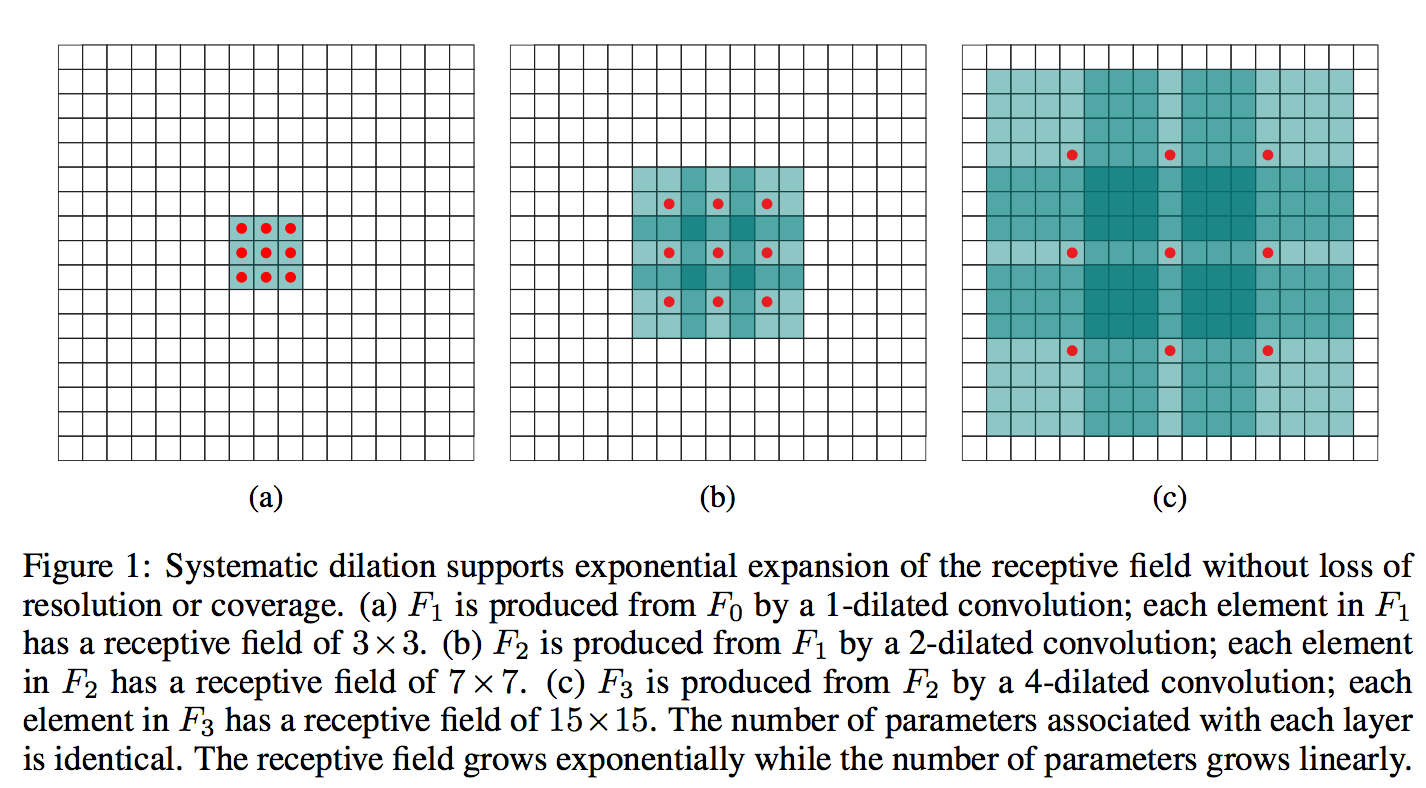

http://www.inference.vc/dilated-convolutions-and-kronecker-factorisation/

In [5]:
model = Sequential()
model.add(Conv2D(32, 3, dilation_rate=2, input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, 3, dilation_rate=2))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

In [6]:
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
             metrics=["accuracy"])

In [7]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 123s 2ms/step - loss: 2.0243 - acc: 0.8430
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0634 - acc: 0.9816
Epoch 3/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0469 - acc: 0.9858
Epoch 4/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0366 - acc: 0.9894
Epoch 5/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0298 - acc: 0.9910
Epoch 6/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0274 - acc: 0.9919
Epoch 7/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0223 - acc: 0.9934
Epoch 8/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0226 - acc: 0.9936
Epoch 9/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0180 - acc: 0.9948
Epoch 10/10
60000/60000 [==============================] - 1881s 31ms/step - loss: 0.0207 - 

In [8]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 8s 773us/step


[0.074942461383188941, 0.98470000000000002]

Prediction:  3
--------------


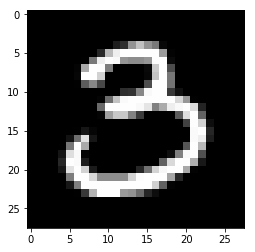

In [9]:
random_mnist_character = random.choice(x_train)
result = np.argmax(model.predict(np.array([random_mnist_character])))
print("Prediction: ", result)
print("--------------")

plot.imshow(random_mnist_character.reshape(28,28), cmap='gray')
plot.show()